In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

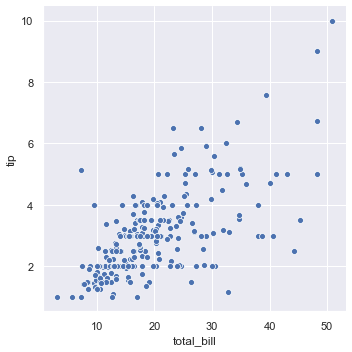

In [2]:
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", data=tips)

### 色调

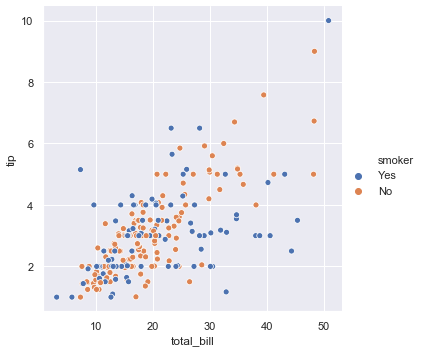

In [4]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips)

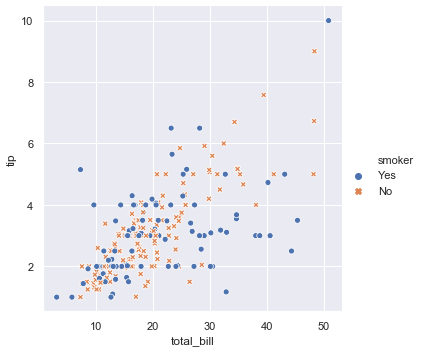

In [5]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker",data=tips)

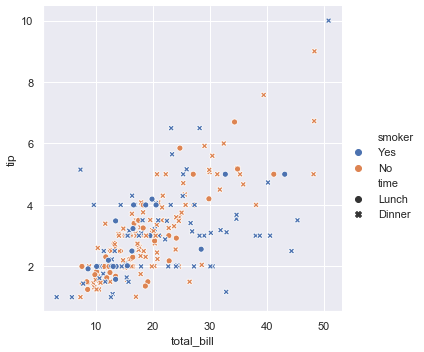

In [6]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips)

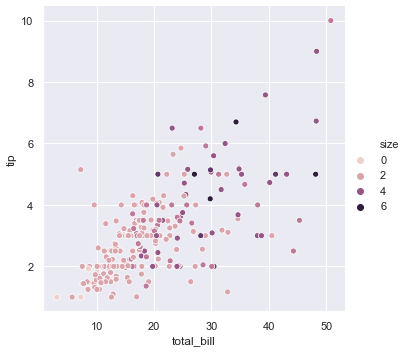

In [7]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips)

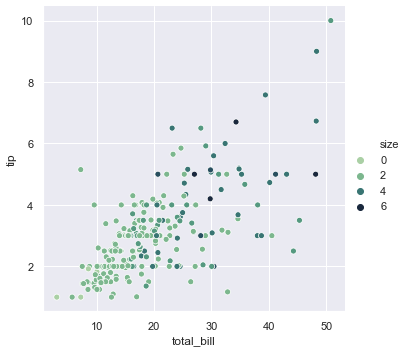

In [8]:
sns.relplot(x="total_bill", y="tip", hue="size", palette="ch:r=-.5,l=.75", data=tips)

### 大小

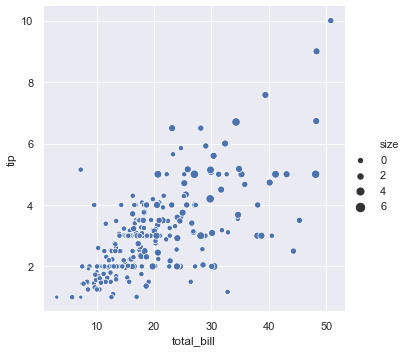

In [9]:
sns.relplot(x="total_bill", y="tip", size="size", data=tips)

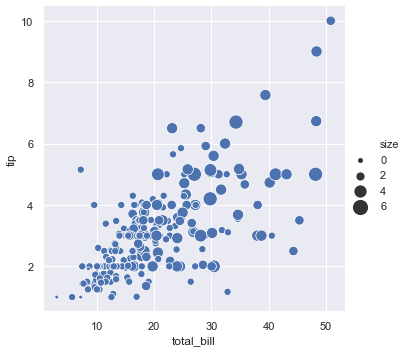

In [10]:
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips)

### 线图

In [16]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
df.head()

,time,value
0,0,1.273307
1,1,0.836659
2,2,0.789640
3,3,-0.118751
4,4,-0.119473


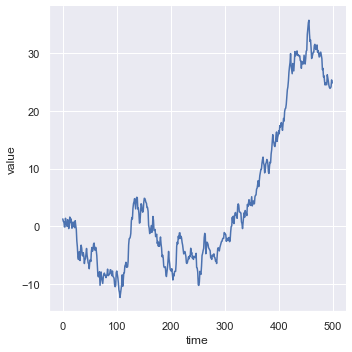

In [17]:
g = sns.relplot(x="time", y="value", kind="line", data=df)
# g.fig.autofmt_xdate()

In [19]:
df1 = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["x", "y"])
df1.head()

,x,y
0,-1.188186,1.246270
1,0.760098,1.609148
2,1.176349,2.441181
3,2.482000,3.301552
4,4.066010,2.778999


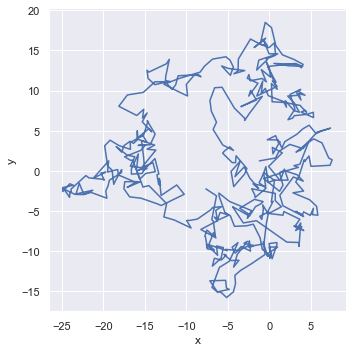

In [21]:
sns.relplot(x="x", 
            y="y", 
            sort=False,  # 排序
            kind="line", 
            data=df1);

### 聚合不确定浮动

In [22]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


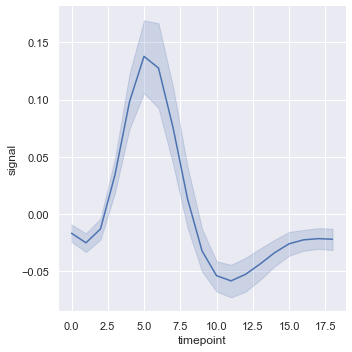

In [23]:
sns.relplot(x="timepoint", 
            y="signal", 
            kind="line", 
            data=fmri);
# 默认置信区间

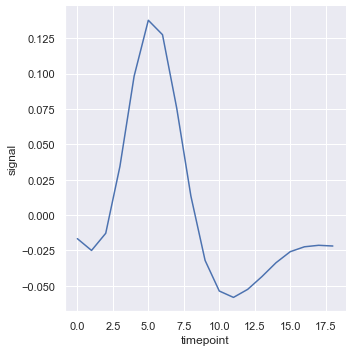

In [24]:
sns.relplot(x="timepoint", 
            y="signal", 
            ci=None, 
            kind="line", 
            data=fmri);

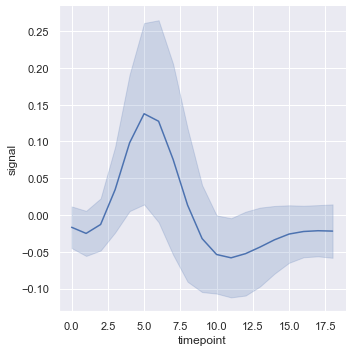

In [25]:
sns.relplot(x="timepoint", 
            y="signal", 
            kind="line", 
            ci="sd",  # 标准差
            data=fmri);

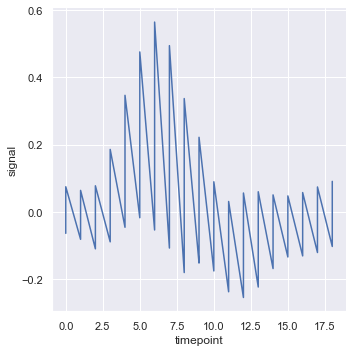

In [26]:
sns.relplot(x="timepoint", 
            y="signal", 
            estimator=None, # 关闭聚合
            kind="line", 
            data=fmri);

### 绘制数据子集

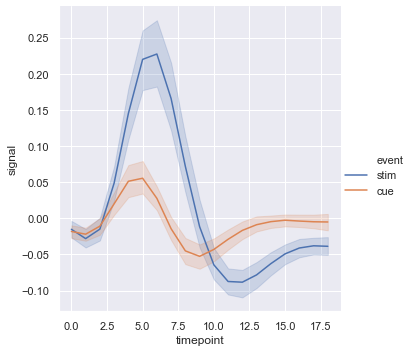

In [27]:
sns.relplot(x="timepoint", 
            y="signal", 
            hue="event", 
            kind="line", 
            data=fmri);

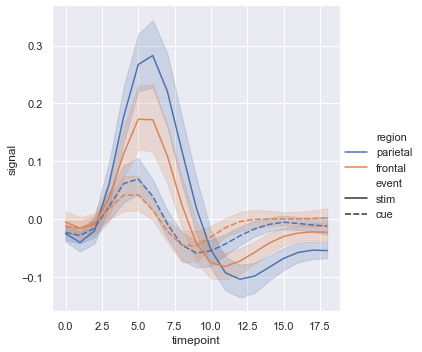

In [28]:
sns.relplot(x="timepoint", 
            y="signal", 
            hue="region", 
            style="event",
            kind="line", 
            data=fmri);

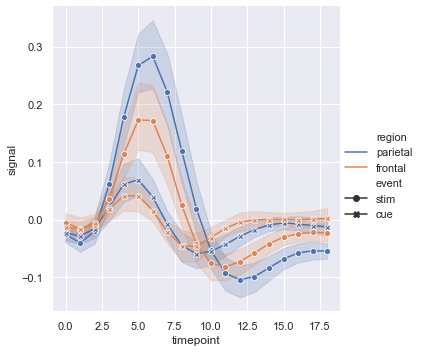

In [32]:
sns.relplot(x="timepoint", 
            y="signal", 
            hue="region", 
            style="event",
            dashes=False, 
            markers=True, 
            kind="line", 
            data=fmri);

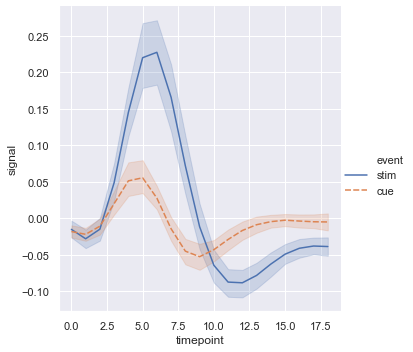

In [33]:
sns.relplot(x="timepoint", 
            y="signal", 
            hue="event", 
            style="event",
            kind="line", 
            data=fmri);

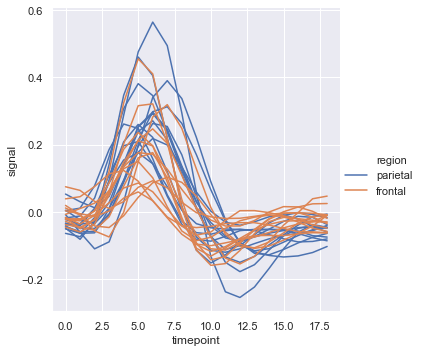

In [34]:
sns.relplot(x="timepoint", 
            y="signal", 
            hue="region",
            units="subject", 
            estimator=None,
            kind="line", 
            data=fmri.query("event == 'stim'"));

In [37]:
dots = sns.load_dataset("dots").query("align == 'dots'")


In [39]:
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


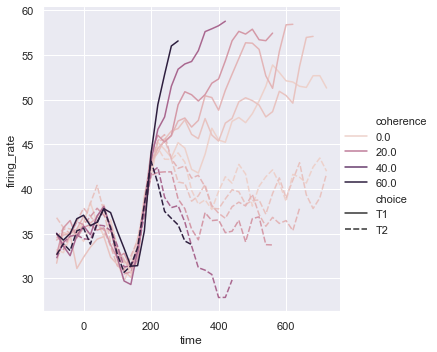

In [38]:
sns.relplot(x="time", 
            y="firing_rate",
            hue="coherence", 
            style="choice",
            kind="line", 
            data=dots);

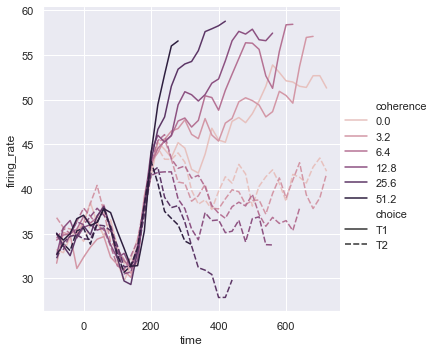

In [40]:
palette = sns.cubehelix_palette(light=.8, n_colors=6)
sns.relplot(x="time", 
            y="firing_rate",
            hue="coherence", 
            style="choice",
            palette=palette,
            kind="line", 
            data=dots);

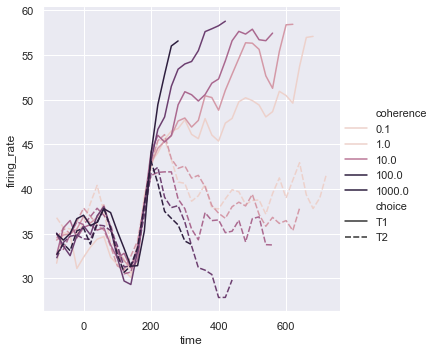

In [41]:
from matplotlib.colors import LogNorm
palette = sns.cubehelix_palette(light=.7, n_colors=6)
sns.relplot(x="time", 
            y="firing_rate",
            hue="coherence", 
            style="choice",
            hue_norm=LogNorm(),
            kind="line", 
            data=dots);

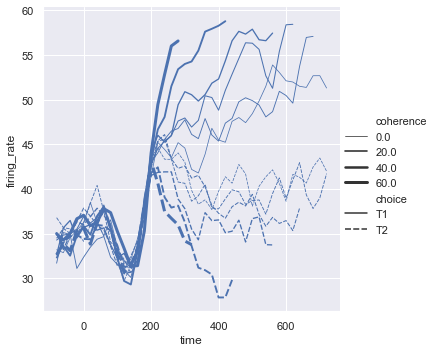

In [42]:
sns.relplot(x="time", 
            y="firing_rate",
            size="coherence", 
            style="choice",
            kind="line", 
            data=dots);

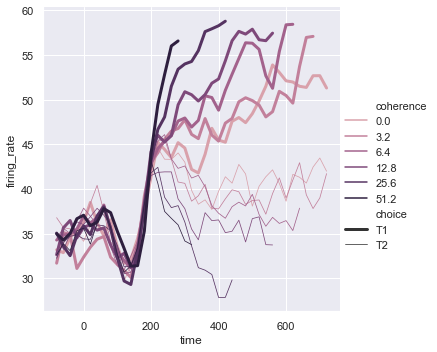

In [43]:
sns.relplot(x="time", 
            y="firing_rate",
            hue="coherence", 
            size="choice",
            palette=palette,
            kind="line", 
            data=dots);

### 处理日期数据

d:\python\virtualenvs\jupy36\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


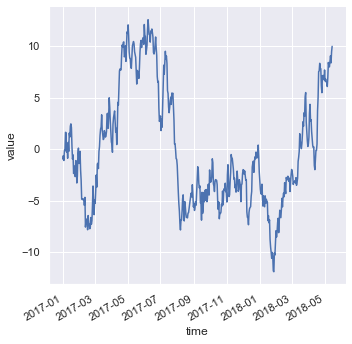

In [44]:
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", 
                y="value", 
                kind="line", 
                data=df)
g.fig.autofmt_xdate()